In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [32]:
# Data Reading 

import os
from glob import glob
from PIL import Image



In [33]:
# Data Processing 

import numpy as np
import pandas as pd
import cv2
import random
import albumentations as A

In [34]:
# Data Analysis

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Data Modeling & Model Evaluation

from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow.keras import layers, models
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score, precision_score, f1_score

In [36]:
# Grad-CAM

import keras
import matplotlib.cm as cm


In [37]:
# Reading the data
# This method is basically assigining negative result to the Normal images in the directory 
# C:\Users\hp\Desktop\MinorProject\COVID-19_Radiography_Dataset\Normal
# Also it is assigning positive result to the COVID images in the directory
# C:\Users\hp\Desktop\MinorProject\COVID-19_Radiography_Dataset\COVID
levels = ['Lung_Opacity','Viral_Pneumonia','COVID','Normal']
path = "C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)

data = []
for id, level in enumerate(levels):
    for file in os.listdir(os.path.join(data_dir, level)):
        data.append(['{}/{}'.format(level, file), level])

data = pd.DataFrame(data, columns = ['image_file', 'Result'])

data['path'] = path + '/' + data['image_file']
data['Result'] = data['Result'].map({'Normal': 'Negative', 'COVID': 'Positive','Lung_Opacity': 'Lung_Opacity','Viral_Pneumonia': 'Viral_Pneumonia'})

data.head()

# data.sample()
# The above method is similar to training model.

,image_file,Result,path
0,Lung_Opacity/Lung_Opacity-1.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...
1,Lung_Opacity/Lung_Opacity-10.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...
2,Lung_Opacity/Lung_Opacity-2.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...
3,Lung_Opacity/Lung_Opacity-3.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...
4,Lung_Opacity/Lung_Opacity-4.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...


In [38]:
# Printing the number of duplicated samples and the total number of samples.
print('Number of Duplicated Samples: %d'%(data.duplicated().sum()))
print('Number of Total Samples: %d'%(data.isnull().value_counts()))

Number of Duplicated Samples: 0
Number of Total Samples: 40


# EXPLORATORY DATA ANALYSIS

In [39]:
# Count Plot
# Showing the count of the plot and showing the number of covid positive and negative cases.
df = pd.DataFrame()
df['Result'] = ['Positive','Viral_Pneumonia','Negative','Lung_Opacity']
df['Count'] = [len(data[data['Result'] == 'Positive']),len(data[data['Result'] == 'Viral_Pneumonia']), len(data[data['Result'] == 'Negative']),len(data[data['Result'] == 'Lung_Opacity'])]
df = df.sort_values(by = ['Count'], ascending = False)

fig = px.bar(df, x = 'Result', y = 'Count', 
             color = "Result", text_auto='', width = 600, 
             color_discrete_sequence = ["orange", "purple","blue","green"],
             template = 'plotly_dark')

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)

fig.show()

In [40]:
#Image Samples
data['image'] = data['path'].map(lambda x: np.asarray(Image.open(x).resize((75,75))))

data.head()

,image_file,Result,path,image
0,Lung_Opacity/Lung_Opacity-1.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,Lung_Opacity/Lung_Opacity-10.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[16, 19, 27, 38, 26, 19, 16, 13, 12, 11, 12, ..."
2,Lung_Opacity/Lung_Opacity-2.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,Lung_Opacity/Lung_Opacity-3.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."
4,Lung_Opacity/Lung_Opacity-4.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[3, 2, 1, 63, 79, 85, 50, 0, 2, 2, 2, 2, 3, 3..."


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [3 3 3]
  [3 3 3]
  [2 2 2]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [3 3 3]
  [3 3 3]
  [3 3 3]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [2 2 2]
  [3 3 3]
  [2 2 2]]]
[[[ 34  34  34]
  [ 23  23  23]
  [ 20  20  20]
  ...
  [ 25  25  25]
  [ 30  30  30]
  [ 35  35  35]]

 [[ 28  28  28]
  [ 24  24  24]
  [ 23  23  23]
  ...
  [ 28  28  28]
  [ 33  33  33]
  [ 37  37  37]]

 [[ 27  27  27]
  [ 27  27  27]
  [ 28  28  28]
  ...
  [ 28  28  28]
  [ 32  32  32]
  [ 33  33  33]]

 ...

 [[150 150 150]
  [162 162 162]
  [160 160 160]
  ...
  [ 46  46  46]
  [ 45  45  45]
  [ 41  41  41]]

 [[147 147 147]
  [158 158 158]
  [155 155 155]
  ...
  [ 45  45  45]
  [ 45  45  45]
  [ 42  42  42]]

 [[127 127 127]
  [136 136 136]
  [135 135 135]
  ...
  [ 43

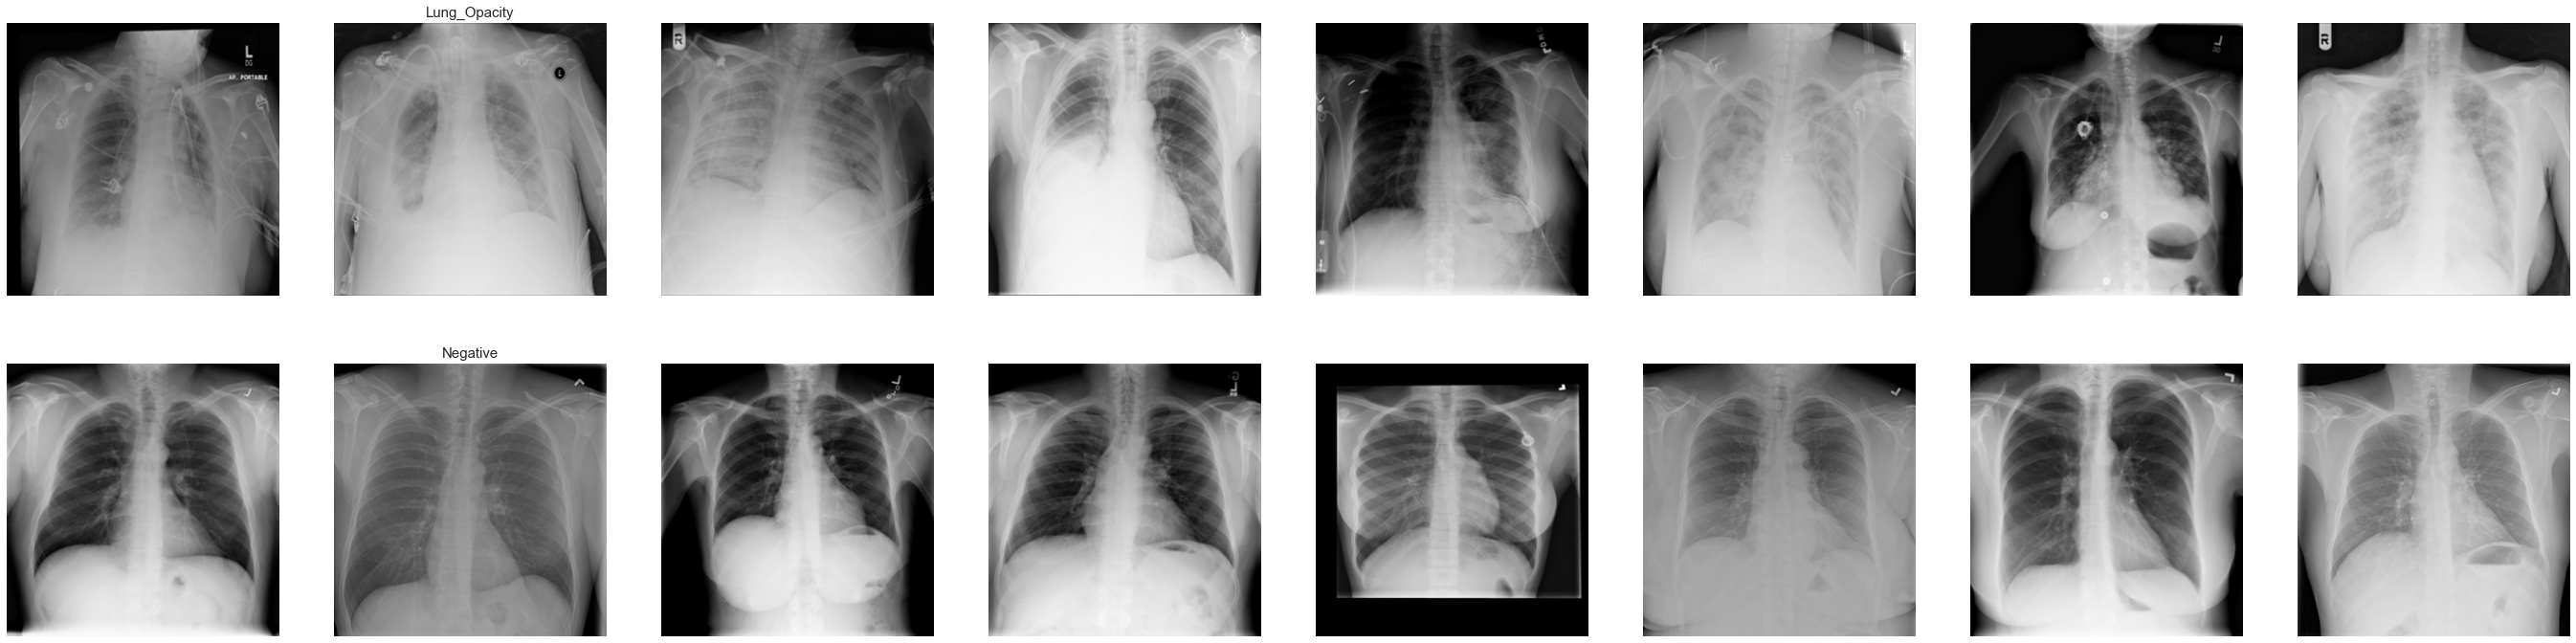

In [41]:
# In 2-d-matrix form showing the pixel values of the image.
n_samples = 8

fig, m_axs = plt.subplots(2, n_samples, figsize = (6*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs, data.sort_values(['Result']).groupby('Result')):
    n_axs[1].set_title(type_name, fontsize = 15)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state = 1234).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
#imread converts the image in the matrix form of its pixels here 2-d matrix
        print(image)
        c_ax.imshow(image)
        c_ax.axis('off')

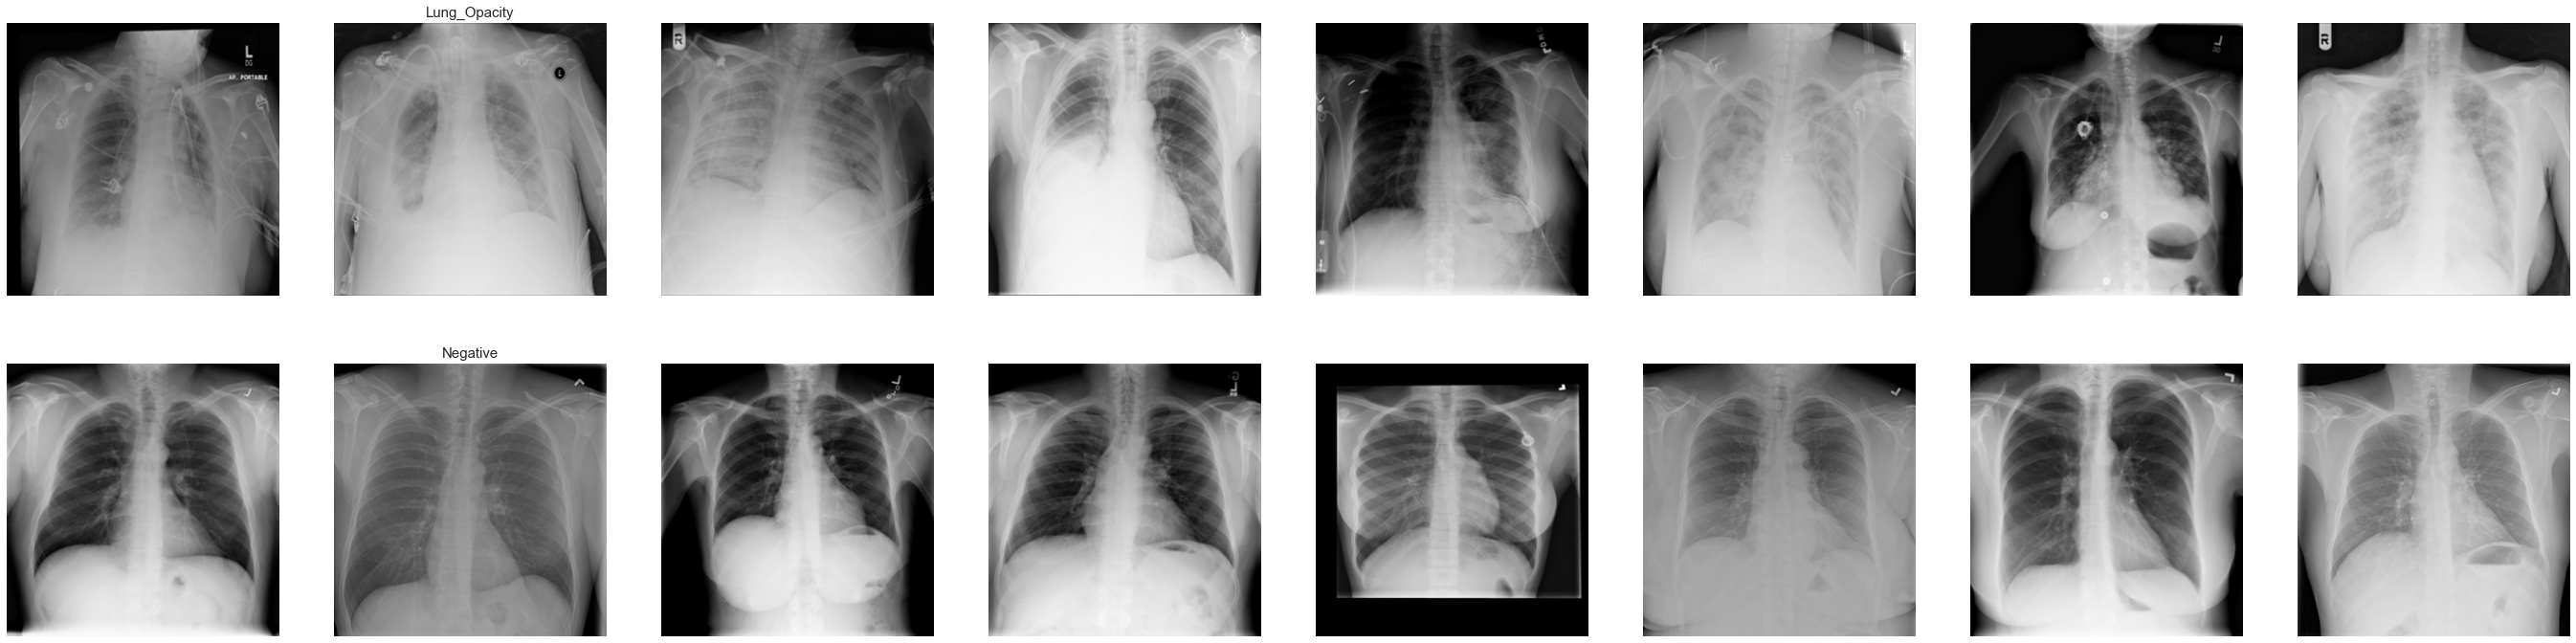

In [42]:
#Basically displaying some data samples tagged as positive and negative.
n_samples = 8

fig, m_axs = plt.subplots(2, n_samples, figsize = (6*n_samples, 3*4))

for n_axs, (type_name, type_rows) in zip(m_axs, data.sort_values(['Result']).groupby('Result')):
    n_axs[1].set_title(type_name, fontsize = 15)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state = 1234).iterrows()):       
        picture = c_row['path']
        image = cv2.imread(picture)
#         print(image)
        c_ax.imshow(image)
    # Simply shows the image
        c_ax.axis('off')

In [43]:
#Random Image Analysis
# plt.figure()
# image = cv2.imread("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png")
# plt.imshow(image)
# plt.axis('off')
# plt.show()

In [44]:
# the below features is for this image image = cv2.imread
#("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png")
print('Image Shape: {}'.format(image.shape))
print('Image Height: {}'.format(image.shape[0]))
print('Image Width: {}'.format(image.shape[1]))
print('Image Dimension: {}'.format(image.ndim))
print('Image Size: {}kb'.format(image.size//1024))
print('Image Data Type: {}'.format(image.dtype))
print('Maximum RGB value of the image: {}'.format(image.max()))
print('Minimum RGB value of the image: {}'.format(image.min()))

Image Shape: (299, 299, 3)
Image Height: 299
Image Width: 299
Image Dimension: 3
Image Size: 261kb
Image Data Type: uint8
Maximum RGB value of the image: 235
Minimum RGB value of the image: 0


In [45]:
# B-channel
# Basically turn the B channel as 0 in R,G,B three channels
# the below features is for this image image = cv2.imread
#("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/COVID/COVID-1002.png")
# plt.title('B channel', fontsize = 14)
# plt.imshow(image[ : , : , 0])
# plt.axis('off');
# plt.show()

In [46]:
# Ben Grahams Method
# First, we convert the images to greyscale and then apply Gaussian blur to them.
all_covid = []
all_normal = []
all_viral_pneumonia = []

all_normal.extend(glob(os.path.join(path, "Normal/*.png")))
all_normal.extend(glob(os.path.join(path, "Lung_Opacity/*.png")))
all_viral_pneumonia.extend(glob(os.path.join(path, "Viral_Pneumonia/*.png")))
all_covid.extend(glob(os.path.join(path, "COVID/*.png")))

random.shuffle(all_normal)
random.shuffle(all_viral_pneumonia)
random.shuffle(all_covid)

images = all_normal[:50] + all_covid[:50] + all_viral_pneumonia[:50]

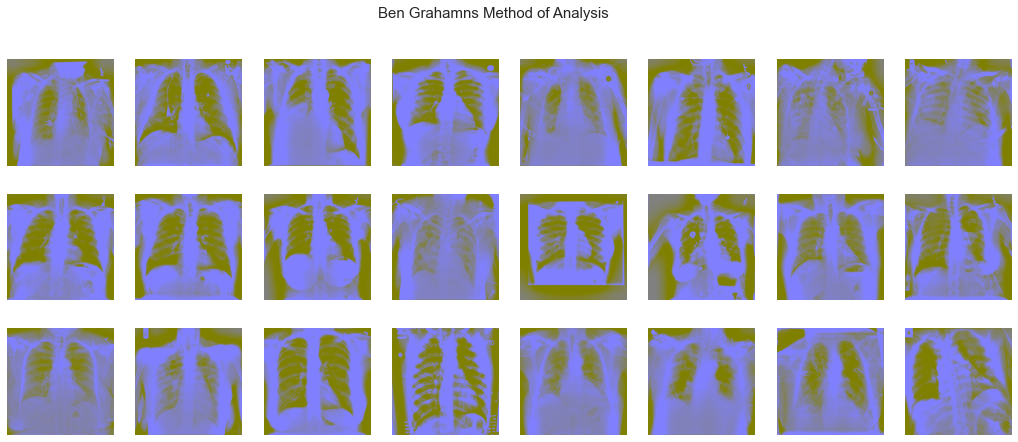

In [47]:
fig = plt.figure(figsize = (18, 7))
fig.suptitle("Ben Grahamns Method of Analysis", fontsize = 15)
columns = 8; rows = 3

for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis(False)

# Statistical Feature Extraction


In [48]:
# We are finding the mean, standard deviation, max value, min value
mean_val = []
std_dev_val = []
max_val = []
min_val = []
samples=int(data.isnull().value_counts())

for i in range(0, samples):
    mean_val.append(data['image'][i].mean())
    std_dev_val.append(np.std(data['image'][i]))
    max_val.append(data['image'][i].max())
    min_val.append(data['image'][i].min())

imageEDA = data.loc[:,['image','Result','path']]
imageEDA['mean'] = mean_val
imageEDA['stedev'] = std_dev_val
imageEDA['max'] = max_val
imageEDA['min'] = min_val

imageEDA['subt_mean'] = imageEDA['mean'].mean() - imageEDA['mean']


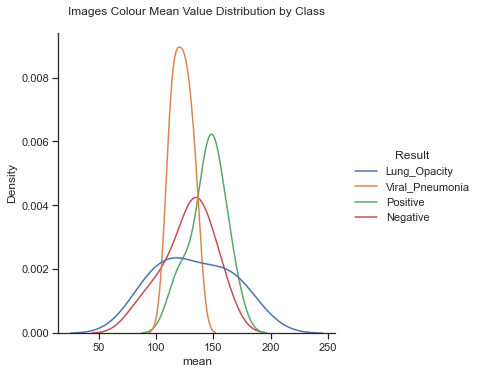

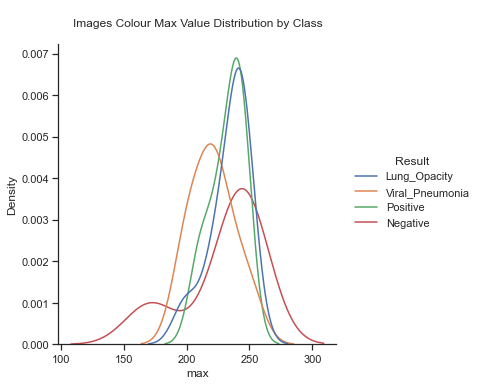

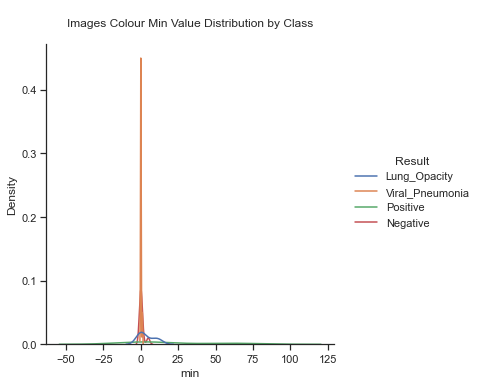

In [49]:

# The Mean vs Density plot insights for pixels:

# The max pixel value for Covid Negative cases is greater than 0.014 and less than 0.016.
# The max pixel value for Covid Positive cases is greater than 0.004 & less than 0.006.
ax1 = sns.displot(data = imageEDA, x = 'mean', kind="kde", hue = 'Result');
plt.title('Images Colour Mean Value Distribution by Class\n', fontsize = 12);


# The Max vs Density plot insights for pixels:

# The max pixel value for Covid Negative cases is greater than 0.035 and less than 0.040.
# The max pixel value for Covid Positive cases is 0.005.
ax2 = sns.displot(data = imageEDA, x = 'max', kind="kde", hue = 'Result');
plt.title('\nImages Colour Max Value Distribution by Class\n', fontsize = 12);


# The Min vs Density plot insights for pixels:

# The max pixel value for Covid Negative cases is greater than 0.4.
# The max pixel value for Covid Positive cases is greater than 0.0 and less than 0.1.
ax3 = sns.displot(data = imageEDA, x = 'min', kind="kde", hue = 'Result');
plt.title('\nImages Colour Min Value Distribution by Class\n', fontsize = 12);

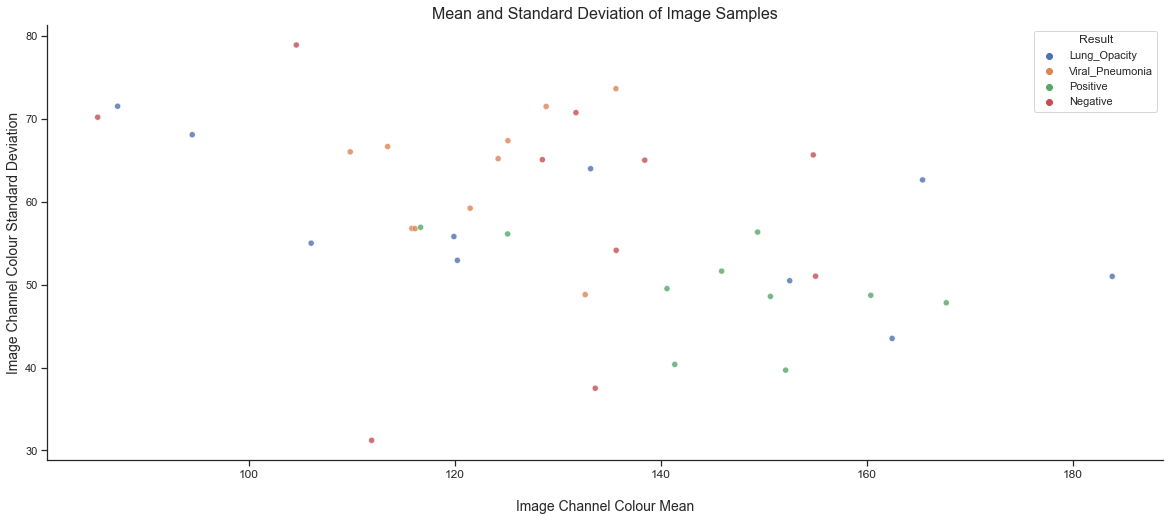

In [50]:
# We observe that there are 2 clusters formed, one for Covid Positive, one for Covid Negative and both have several 
# overlappings. Overlapping Color Mean range: (100 - 175)
# We observe that for pixels having Std Deviation below 30 are all Covid Positive Images (Orange Colored)
plt.figure(figsize = (20, 8))
sns.set(style = "ticks", font_scale = 1)
ax = sns.scatterplot(data = imageEDA, x = "mean", y = imageEDA['stedev'], hue = 'Result', alpha = 0.8);
sns.despine(top = True, right = True, left = False, bottom = False)
plt.xticks(rotation = 0, fontsize = 12)
ax.set_xlabel('\nImage Channel Colour Mean', fontsize = 14)
ax.set_ylabel('Image Channel Colour Standard Deviation', fontsize = 14)
plt.title('Mean and Standard Deviation of Image Samples', fontsize = 16);


<Figure size 720x576 with 0 Axes>

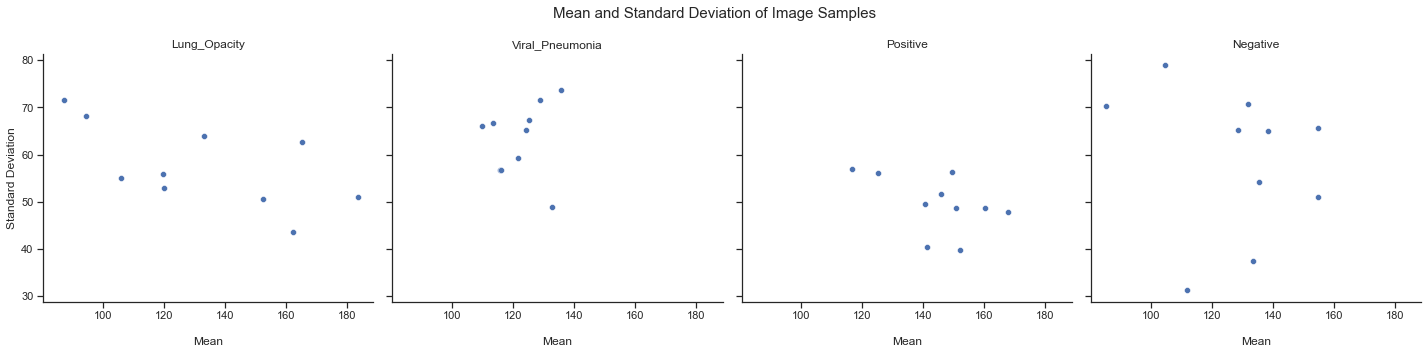

In [51]:
# Comparing both Scatter plots, we observe that Postivie Samples have outliers (pixel points).
plt.figure(figsize = (10, 8));
g = sns.FacetGrid(imageEDA, col = "Result", height = 5);
g.map_dataframe(sns.scatterplot, x = 'mean', y = 'stedev');
g.set_titles(col_template = "{col_name}", row_template= "{row_name}", size = 12);
g.fig.subplots_adjust(top = .7);
g.fig.suptitle('Mean and Standard Deviation of Image Samples', fontsize = 15);
axes = g.axes.flatten();
axes[0].set_ylabel('Standard Deviation');
for ax in axes:
    ax.set_xlabel('\nMean');
g.fig.tight_layout();


# Global Transformation and Moment(Zernike Moments)

In [52]:
# data.iloc[[0]]['HandCrafted_1D_array']=[1,2,3]
# data.iloc[[0]]

import pandas as pd
temp = []
for id in range(data.shape[0]):
    temp.append([1,2,3])

# temp1=data
# temp1['Zernike_1d_array'] = temp
# # temp1 = temp1.append(dict(zip(temp1.columns, temp)), ignore_index=True)
# # temp1.loc[len(data)] = temp
# # data.shape[0]
# print(temp1['Zernike_1d_array'])
data.iloc[1]['path']

'C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/Lung_Opacity/Lung_Opacity-10.png'

In [53]:
# importing required libraries
import mahotas
import mahotas.demos
from pylab import gray, imshow, show
import numpy as np
import matplotlib.pyplot as plt
   
# loading image
# img = mahotas.demos.load('nuclear')
temp=[]
for i in range(data.shape[0]):
    img = cv2.imread(data.iloc[i]['path'])
    img = img.max(2)
    value = mahotas.features.zernike_moments(img, 10)
    temp.append(np.array(value))

data['Zernike_1d_array'] = temp
data


,image_file,Result,path,image,Zernike_1d_array
0,Lung_Opacity/Lung_Opacity-1.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.3183098861837904, 0.006233950142285139, 0.0..."
1,Lung_Opacity/Lung_Opacity-10.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[16, 19, 27, 38, 26, 19, 16, 13, 12, 11, 12, ...","[0.3183098861837918, 0.004450046007360941, 0.0..."
2,Lung_Opacity/Lung_Opacity-2.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.31830988618379086, 0.006658242210711285, 0...."
3,Lung_Opacity/Lung_Opacity-3.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...","[0.3183098861837905, 0.047515516102568704, 0.0..."
4,Lung_Opacity/Lung_Opacity-4.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[3, 2, 1, 63, 79, 85, 50, 0, 2, 2, 2, 2, 3, 3...","[0.3183098861837905, 0.0070717640677661784, 0...."
5,Lung_Opacity/Lung_Opacity-5.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[28, 3, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6...","[0.31830988618379047, 0.008697724720000124, 0...."
6,Lung_Opacity/Lung_Opacity-6.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[4, 5, 4, 5, 6, 6, 5, 4, 4, 4, 4, 5, 5, 5, 5,...","[0.31830988618379086, 0.011385901018999202, 0...."
7,Lung_Opacity/Lung_Opacity-7.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[26, 24, 23, 22, 20, 20, 20, 21, 22, 21, 20, ...","[0.3183098861837907, 0.0034717748408046667, 0...."
8,Lung_Opacity/Lung_Opacity-8.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[40, 58, 85, 105, 126, 138, 111, 95, 97, 98, ...","[0.318309886183792, 0.0030022978490163413, 0.0..."
9,Lung_Opacity/Lung_Opacity-9.png,Lung_Opacity,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[24, 24, 23, 23, 15, 35, 181, 188, 187, 68, 1...","[0.31830988618378975, 0.002160469961068182, 0...."


In [143]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['Result'])
data['Result']=le.transform(data['Result'])

# X = (data.iloc[:]['Zernike_1d_array'])
# 
# X.shape
# X=pd.DataFrame((data.iloc[:]['Zernike_1d_array']))
# y = data.iloc[:]['Result']
lists=data.iloc[:]['Zernike_1d_array']
array2d=[]
for i in range(40):
    array2d.append(lists[i])
array2d=pd.DataFrame(array2d)
print(array2d)
X=array2d
y =data.iloc[:]['Result']

         0         1         2         3         4         5         6   \
0   0.31831  0.006234  0.004611  0.009979  0.015430  0.006738  0.004779   
1   0.31831  0.004450  0.006613  0.004399  0.001723  0.012155  0.013050   
2   0.31831  0.006658  0.009784  0.005972  0.013439  0.005715  0.010141   
3   0.31831  0.047516  0.004134  0.005603  0.006169  0.011340  0.018246   
4   0.31831  0.007072  0.004194  0.005594  0.000872  0.010394  0.007756   
5   0.31831  0.008698  0.014114  0.002631  0.013023  0.005539  0.011238   
6   0.31831  0.011386  0.002158  0.000855  0.011413  0.012909  0.001123   
7   0.31831  0.003472  0.007091  0.011311  0.008833  0.004710  0.011948   
8   0.31831  0.003002  0.003897  0.008603  0.002545  0.008886  0.006783   
9   0.31831  0.002160  0.013890  0.017631  0.004876  0.004268  0.021595   
10  0.31831  0.006319  0.008738  0.003995  0.006457  0.008611  0.006968   
11  0.31831  0.004237  0.004012  0.007534  0.008611  0.001600  0.000903   
12  0.31831  0.002425  0.

In [55]:


# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
# # # Predict on dataset which model has not seen before
y_pred=knn.predict(X_test)
y_pred

array([2, 1, 1, 1, 0, 0, 0, 1])

In [56]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 2, 0, 0],
       [1, 2, 1, 0]], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc*100

12.5

In [ ]:
# Gabor filter 
# https://scikit-image.org/docs/0.11.x/auto_examples/plot_gabor.html
# Please Explain could not understand

In [29]:
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as nd
from PIL import Image

from skimage import data
from skimage.util import img_as_float
from skimage.filters import gabor_kernel


def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = nd.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats


def match(feats, ref_feats):
    min_error = np.inf
    min_i = None
    for i in range(ref_feats.shape[0]):
        error = np.sum((feats - ref_feats[i, :])**2)
        if error < min_error:
            min_error = error
            min_i = i
    return min_i


# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)


shrink = (slice(0, None, 3), slice(0, None, 3))
img1 = Image.open("C:/Users/hp/Desktop/New_Minor_Project/Minor-Project/COVID-19_Radiography_Dataset/Normal/Normal-1.png").convert('L')
img2 = Image.open("C:/Users/hp/Desktop/New_Minor_Project/Minor-Project/COVID-19_Radiography_Dataset/COVID/COVID-1.png").convert('L')


Normal = img_as_float(img1)[shrink]#Convert an image to floating point format, with values in [0, 1].
Covid = img_as_float(img2)[shrink]
image_names = ('Normal', 'Covid')
images = (Normal, Covid)

# # prepare reference features
ref_feats = np.zeros((3, len(kernels), 2), dtype=np.double)
ref_feats[0, :, :] = compute_feats(Normal, kernels)
ref_feats[1, :, :] = compute_feats(Covid, kernels)
ref_feats
print('Rotated images matched against references using Gabor filter banks:')

print('original: brick, rotated: 30deg, match result: ', end='')
feats = compute_feats(nd.rotate(Normal, angle=190, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])

print('original: brick, rotated: 70deg, match result: ', end='')
feats = compute_feats(nd.rotate(Covid, angle=70, reshape=False), kernels)
print(image_names[match(feats, ref_feats)])


def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(nd.convolve(image, np.real(kernel), mode='wrap')**2 +
                   nd.convolve(image, np.imag(kernel), mode='wrap')**2)

# Plot a selection of the filter bank kernels and their responses.
results = []
kernel_params = []
for theta in (0, 1):
    theta = theta / 4. * np.pi
    for frequency in (0.1, 0.4):
        kernel = gabor_kernel(frequency, theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        print(kernel)
        # Save kernel and the power image for each image
        results.append((kernel, [power(img, kernel) for img in images]))
# results

# fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(5, 6))
# plt.gray()

# fig.suptitle('Image responses for Gabor filter kernels', fontsize=12)

# axes[0][0].axis('off')

# # Plot original images
# for label, img, ax in zip(image_names, images, axes[0][1:]):
#     ax.imshow(img)
#     ax.set_title(label, fontsize=9)
#     ax.axis('off')

# for label, (kernel, powers), ax_row in zip(kernel_params, results, axes[1:]):
#     # Plot Gabor kernel
#     ax = ax_row[0]
#     ax.imshow(np.real(kernel), interpolation='nearest')
#     ax.set_ylabel(label, fontsize=7)
#     ax.set_xticks([])
#     ax.set_yticks([])

# #   Plot Gabor responses with the contrast normalized for each filter
# #     vmin = np.min(powers)
# #     vmax = np.max(powers)
#     for patch, ax in zip(powers, ax_row[1:]):
#         ax.imshow(patch)
#         ax.axis('off')

# plt.show()

Rotated images matched against references using Gabor filter banks:
original: brick, rotated: 30deg, match result: Normal
original: brick, rotated: 70deg, match result: Covid
[[-1.66211698e-07+5.11547006e-07j -7.33462390e-07+5.32891619e-07j
  -1.48053715e-06-5.43940526e-22j ... -1.48053715e-06+5.43940526e-22j
  -7.33462390e-07-5.32891619e-07j -1.66211698e-07-5.11547006e-07j]
 [-2.80157704e-07+8.62236752e-07j -1.23628566e-06+8.98214111e-07j
  -2.49551563e-06-9.16837568e-22j ... -2.49551563e-06+9.16837568e-22j
  -1.23628566e-06-8.98214111e-07j -2.80157704e-07-8.62236752e-07j]
 [-4.57511142e-07+1.40807451e-06j -2.01891455e-06+1.46682728e-06j
  -4.07529827e-06-1.49724029e-21j ... -4.07529827e-06+1.49724029e-21j
  -2.01891455e-06-1.46682728e-06j -4.57511142e-07-1.40807451e-06j]
 ...
 [-4.57511142e-07+1.40807451e-06j -2.01891455e-06+1.46682728e-06j
  -4.07529827e-06-1.49724029e-21j ... -4.07529827e-06+1.49724029e-21j
  -2.01891455e-06-1.46682728e-06j -4.57511142e-07-1.40807451e-06j]
 [-2.801

# Hog Filtering

In [58]:
# importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from PIL import Image
import numpy as np


#reading the image
# img = Image.open("C:/Users/hp/Desktop/MinorProject/COVID-19_Radiography_Dataset/Normal/Normal-1.png").convert('L')
# img = imread('C:/Users/hp/Desktop/New_Minor_Project/Minor-Project/COVID-19_Radiography_Dataset/COVID/COVID-1.png')
#resize image
# resized_img = resize(img, (128,64))

temp=[]
for i in range(data.shape[0]):
    img = imread(data.iloc[i]['path'])
    resized_img = resize(img, (128,64))
    #generating HOG features
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=False)
    temp.append(np.array(fd))

data['Hog_Filter'] = temp
data

,image_file,Result,path,image,Zernike_1d_array,Hog_Filter
0,Lung_Opacity/Lung_Opacity-1.png,0,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.3183098861837904, 0.006233950142285139, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Lung_Opacity/Lung_Opacity-10.png,0,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[16, 19, 27, 38, 26, 19, 16, 13, 12, 11, 12, ...","[0.3183098861837918, 0.004450046007360941, 0.0...","[0.246233375457882, 0.10864557005147593, 0.152..."
2,Lung_Opacity/Lung_Opacity-2.png,0,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.31830988618379086, 0.006658242210711285, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Lung_Opacity/Lung_Opacity-3.png,0,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...","[0.3183098861837905, 0.047515516102568704, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Lung_Opacity/Lung_Opacity-4.png,0,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[3, 2, 1, 63, 79, 85, 50, 0, 2, 2, 2, 2, 3, 3...","[0.3183098861837905, 0.0070717640677661784, 0....","[0.011715909859071576, 0.0, 0.0069036660891690..."
5,Lung_Opacity/Lung_Opacity-5.png,0,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[28, 3, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6...","[0.31830988618379047, 0.008697724720000124, 0....","[0.4717959319469242, 0.29146571831921136, 0.47..."
6,Lung_Opacity/Lung_Opacity-6.png,0,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[4, 5, 4, 5, 6, 6, 5, 4, 4, 4, 4, 5, 5, 5, 5,...","[0.31830988618379086, 0.011385901018999202, 0....","[0.050277131180980525, 0.014052885585620699, 0..."
7,Lung_Opacity/Lung_Opacity-7.png,0,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[26, 24, 23, 22, 20, 20, 20, 21, 22, 21, 20, ...","[0.3183098861837907, 0.0034717748408046667, 0....","[0.204979114126474, 0.0, 0.23297229844855552, ..."
8,Lung_Opacity/Lung_Opacity-8.png,0,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[40, 58, 85, 105, 126, 138, 111, 95, 97, 98, ...","[0.318309886183792, 0.0030022978490163413, 0.0...","[0.031109808531491385, 0.22997540502124006, 0...."
9,Lung_Opacity/Lung_Opacity-9.png,0,C:/Users/hp/Desktop/MinorProject/COVID-19_Radi...,"[[24, 24, 23, 23, 15, 35, 181, 188, 187, 68, 1...","[0.31830988618378975, 0.002160469961068182, 0....","[0.2920195834504214, 0.20023211164773633, 0.02..."


In [145]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import preprocessing

lists=data.iloc[:]['Hog_Filter']
array2d=[]
for i in range(40):
    array2d.append(lists[i])
array2d=pd.DataFrame(array2d)
Hog_features_dataframe=array2d
print(Hog_features_dataframe)
X=array2d
y =data.iloc[:]['Result']

       0         1         2         3         4         5         6      \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.246233  0.108646  0.152054  0.156028  0.232872  0.041234  0.171580   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.011716  0.000000  0.006904  0.000000  0.012692  0.000000  0.000000   
5   0.471796  0.291466  0.471796  0.056718  0.471796  0.000000  0.013684   
6   0.050277  0.014053  0.142205  0.028106  0.169685  0.014053  0.000000   
7   0.204979  0.000000  0.232972  0.234584  0.286956  0.103411  0.027608   
8   0.031110  0.229975  0.288104  0.288104  0.138583  0.011473  0.011473   
9   0.292020  0.200232  0.027456  0.098993  0.292020  0.179039  0.164734   
10  0.321916  0.000000  0.013050  0.000000  0.290934  0.000000  0.026100   
11  0.127730  0.009030  0.082011  0.389945  0.376063  0.011201  0.000000   
12  0.365364

In [60]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
# # # Predict on dataset which model has not seen before
y_pred=knn.predict(X_test)
y_pred

array([2, 3, 3, 1, 1, 3, 1, 1])

In [61]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 1, 3]], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc*100

50.0

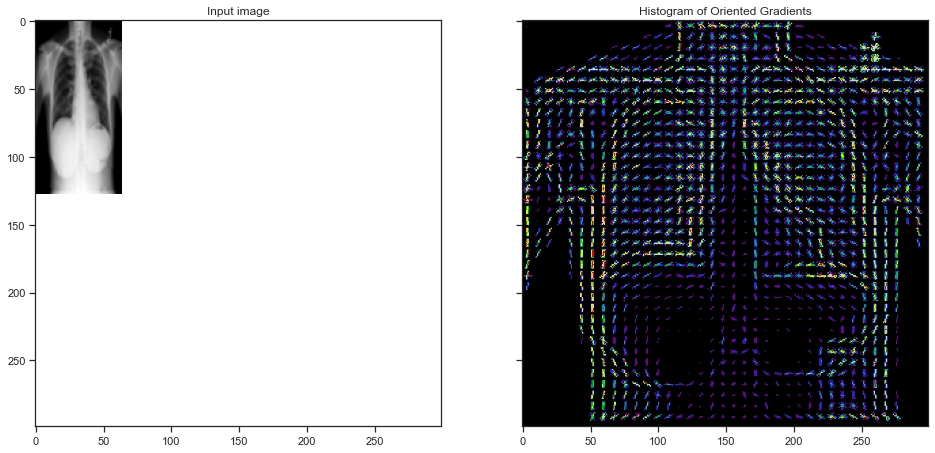

In [63]:
# Histogram of Oriented Gradients (HOG) Feature
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8 ), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.get_cmap('nipy_spectral',10)) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

# Data Modeling

## Pure CNN

In [177]:
#Train Test Split
all_data = []


# Storing images and their labels into a list for further Train Test split

for i in range(len(data)):
    image = cv2.imread(data['path'][i])
    image = cv2.resize(image, (70, 70)) / 255.0
    if(data['Result'][i]==1):
        label=0     #Normal
    elif(data['Result'][i]==2):
        label=1     #Positive
    elif(data['Result'][i]==0):
        label=2     #Lung Opacity
    else:
        label=3   #Viral Pneumonia
    all_data.append([image, label])

In [178]:
x = []
y = []

for image, label in all_data:
    x.append(image)
    y.append(label)
# Converting to Numpy Array    
x = np.array(x)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)

(28, 70, 70, 3) (8, 70, 70, 3) (4, 70, 70, 3) (28,) (8,) (4,)


In [179]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (70, 70, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.3))

cnn_model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.5))

cnn_model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(units = 16, activation = 'relu'))# ???????????????????????????????????
cnn_model.add(layers.Dropout(0.2))

cnn_model.add(layers.Dense(units = 4))

cnn_model.compile(optimizer = 'adam', 
           loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
           metrics = ['accuracy'])

cnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 68, 68, 128)       3584      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 34, 34, 128)      0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 34, 34, 128)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 16, 16, 64)      

In [180]:
es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)

#tf.random.set_seed(42)
history = cnn_model.fit(x_train, y_train, 
                        epochs = 50, batch_size = 256,  
                        validation_data = (x_val, y_val))

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 1.3733 - accuracy: 0.3214 - val_loss: 1.5992 - val_accuracy: 0.2500
Epoch 2/50
1/1 [==============================] - 1s 509ms/step - loss: 1.4309 - accuracy: 0.2500 - val_loss: 1.4755 - val_accuracy: 0.2500
Epoch 3/50
1/1 [==============================] - 1s 638ms/step - loss: 1.3473 - accuracy: 0.2500 - val_loss: 1.4795 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 1s 786ms/step - loss: 1.3547 - accuracy: 0.3571 - val_loss: 1.5028 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 477ms/step - loss: 1.3307 - accuracy: 0.2857 - val_loss: 1.4923 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 476ms/step - loss: 1.3102 - accuracy: 0.3571 - val_loss: 1.4821 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 1s 521ms/step - loss: 1.3314 - accuracy: 0.2857 - val_loss: 1.4642 - val_accuracy: 0.0000e+00
Epo

In [181]:
yp_train = cnn_model.predict(x_train)
yp_train = np.argmax(yp_train, axis = 1)

yp_val = cnn_model.predict(x_val)
yp_val = np.argmax(yp_val, axis = 1)

yp_test = cnn_model.predict(x_test)
yp_test = np.argmax(yp_test, axis = 1)

In [182]:
def evaluation_parametrics(name, y_train, yp_train, y_val, yp_val, y_test, yp_test):
    
    print("\n-----------------------------{}-----------------------------\n".format(name))
    
    cm_train = confusion_matrix(y_train, yp_train)
    t1 = ConfusionMatrixDisplay(cm_train)
    s1 = round((cm_train[0,0]/(cm_train[0,0] + cm_train[0,1])),4)
    
    print("Classification Report for Train Data\n")
    print(classification_report(y_train, yp_train)) 
    print("--------------------------------------------------------------------------")
    print("Recall on Train Data: ", round(recall_score(y_train, yp_train,average='weighted'),4))
    print("Specificity on Train Data: ", s1)
    print("Accuracy on Train Data: ", round(accuracy_score(y_train, yp_train),4))
    print("Precision on Train Data: ", round(precision_score(y_train, yp_train,average='weighted'),4))
    print("F1 Score on Train Data: ", round(f1_score(y_train, yp_train,average='weighted'),4))
    print("--------------------------------------------------------------------------")
       
    cm_val = confusion_matrix(y_val, yp_val)
    t2 = ConfusionMatrixDisplay(cm_val)
    s2 = round((cm_val[0,0]/(cm_val[0,0] + cm_val[0,1])),4)
    
    print("\nClassification Report for Validation Data\n")
    print(classification_report(y_val, yp_val))   
    print("--------------------------------------------------------------------------")
    print("Recall on Val Data: ", round(recall_score(y_val, yp_val,average='weighted'),4))
    print("Specificity on Val Data: ", s2)
    print("Accuracy on Val Data: ", round(accuracy_score(y_val, yp_val),4))
    print("Precision on Val Data: ", round(precision_score(y_val, yp_val,average='weighted'),4))
    print("F1 Score on Val Data: ", round(f1_score(y_val, yp_val,average='weighted'),4))
    print("--------------------------------------------------------------------------")

    cm_test = confusion_matrix(y_test, yp_test)
    t3 = ConfusionMatrixDisplay(cm_test)
    s3 = round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4)
    
    print("\nClassification Report for Test Data\n")
    print(classification_report(y_test, yp_test))   
    print("--------------------------------------------------------------------------")
    print("Recall on Test Data: ", round(recall_score(y_test, yp_test,average='weighted'), 4))
    print("Specificity on Test Data: ", s3)
    print("Accuracy on Test Data: ", round(accuracy_score(y_test, yp_test), 4))
    print("Precision on Test Data: ", round(precision_score(y_test, yp_test,average='weighted'), 4))
    print("F1 Score Test Data: ", round(f1_score(y_test, yp_test,average='weighted'), 4))
    print("--------------------------------------------------------------------------")
    
    t1.plot()
    t2.plot()   
    t3.plot()


-----------------------------Convolution Neural Network-----------------------------

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.83      0.71      0.77         7
           2       0.89      1.00      0.94         8
           3       0.80      1.00      0.89         4

    accuracy                           0.89        28
   macro avg       0.88      0.90      0.89        28
weighted avg       0.90      0.89      0.89        28

--------------------------------------------------------------------------
Recall on Train Data:  0.8929
Specificity on Train Data:  0.8889
Accuracy on Train Data:  0.8929
Precision on Train Data:  0.898
F1 Score on Train Data:  0.8907
--------------------------------------------------------------------------

Classification Report for Validation Data

              precision    recall  f1-score   support

           1       1.00      1

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

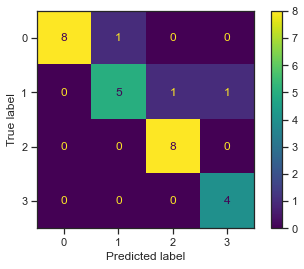

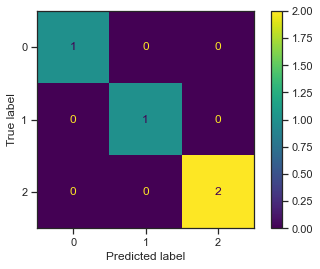

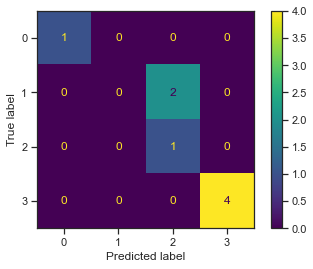

In [183]:
evaluation_parametrics("Convolution Neural Network", y_train, yp_train, y_val, yp_val, y_test, yp_test)

# CNN + Handcrafted Features

In [184]:
#Plot CNN architechture

import pydot
from keras.utils.vis_utils import plot_model
from IPython.display import SVG
import keras.utils.vis_utils 
from keras.utils.vis_utils import model_to_dot

In [185]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stops = EarlyStopping(patience=5, monitor='val_auc')
filepath='keras_model_conv2D'
ckpt_callback = ModelCheckpoint(filepath,
                                 monitor='val_loss', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='auto')
    
cnn_model.fit(x, y, validation_split=0.05, callbacks=[early_stops,ckpt_callback], 
                        batch_size=256, epochs=100)
cnn_model.save('keras_model_conv2D.h5')

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.5155 - accuracy: 0.7105WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 1: val_loss improved from inf to 0.34400, saving model to keras_model_conv2D
INFO:tensorflow:Assets written to: keras_model_conv2D\assets
1/1 [==============================] - 11s 11s/step - loss: 0.5155 - accuracy: 0.7105 - val_loss: 0.3440 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.6518 - accuracy: 0.7368WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 2: val_loss improved from 0.34400 to 0.21978, saving model to keras_model_conv2D
INFO:tensorflow:Assets written to: keras_model_conv2D\assets
1/1 [==============================] - 6s 6s/step - loss: 0.6518 - accuracy: 0.7368 - val_loss: 


Epoch 19: val_loss did not improve from 0.04587
1/1 [==============================] - 1s 598ms/step - loss: 0.4134 - accuracy: 0.8158 - val_loss: 0.8198 - val_accuracy: 0.5000
Epoch 20/100
1/1 [==============================] - ETA: 0s - loss: 0.3390 - accuracy: 0.8947WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 20: val_loss did not improve from 0.04587
1/1 [==============================] - 1s 579ms/step - loss: 0.3390 - accuracy: 0.8947 - val_loss: 0.7889 - val_accuracy: 0.5000
Epoch 21/100
1/1 [==============================] - ETA: 0s - loss: 0.5208 - accuracy: 0.7895WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 21: val_loss did not improve from 0.04587
1/1 [==============================] - 1s 599ms/step - loss: 0.5208 - accuracy: 0.7895 - val_loss: 0.4631 - val

1/1 [==============================] - ETA: 0s - loss: 0.3600 - accuracy: 0.8158WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 39: val_loss did not improve from 0.04587
1/1 [==============================] - 1s 582ms/step - loss: 0.3600 - accuracy: 0.8158 - val_loss: 0.8330 - val_accuracy: 1.0000
Epoch 40/100
1/1 [==============================] - ETA: 0s - loss: 0.4559 - accuracy: 0.7895WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 40: val_loss did not improve from 0.04587
1/1 [==============================] - 1s 585ms/step - loss: 0.4559 - accuracy: 0.7895 - val_loss: 0.9123 - val_accuracy: 0.5000
Epoch 41/100
1/1 [==============================] - ETA: 0s - loss: 0.4275 - accuracy: 0.7368WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not a


Epoch 58: val_loss did not improve from 0.04366
1/1 [==============================] - 1s 592ms/step - loss: 0.2283 - accuracy: 0.9211 - val_loss: 0.2042 - val_accuracy: 1.0000
Epoch 59/100
1/1 [==============================] - ETA: 0s - loss: 0.1608 - accuracy: 0.9474WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 59: val_loss did not improve from 0.04366
1/1 [==============================] - 1s 585ms/step - loss: 0.1608 - accuracy: 0.9474 - val_loss: 0.2927 - val_accuracy: 1.0000
Epoch 60/100
1/1 [==============================] - ETA: 0s - loss: 0.3528 - accuracy: 0.7895WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 60: val_loss did not improve from 0.04366
1/1 [==============================] - 1s 597ms/step - loss: 0.3528 - accuracy: 0.7895 - val_loss: 0.2812 - val

1/1 [==============================] - ETA: 0s - loss: 0.1498 - accuracy: 0.9737WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 78: val_loss did not improve from 0.04366
1/1 [==============================] - 1s 633ms/step - loss: 0.1498 - accuracy: 0.9737 - val_loss: 0.7476 - val_accuracy: 0.5000
Epoch 79/100
1/1 [==============================] - ETA: 0s - loss: 0.1023 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 79: val_loss did not improve from 0.04366
1/1 [==============================] - 1s 619ms/step - loss: 0.1023 - accuracy: 1.0000 - val_loss: 0.6376 - val_accuracy: 0.5000
Epoch 80/100
1/1 [==============================] - ETA: 0s - loss: 0.2117 - accuracy: 0.8947WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not a


Epoch 97: val_loss did not improve from 0.03848
1/1 [==============================] - 1s 604ms/step - loss: 0.2724 - accuracy: 0.8684 - val_loss: 0.5596 - val_accuracy: 0.5000
Epoch 98/100
1/1 [==============================] - ETA: 0s - loss: 0.0221 - accuracy: 1.0000WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 98: val_loss did not improve from 0.03848
1/1 [==============================] - 1s 606ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 0.9206 - val_accuracy: 0.5000
Epoch 99/100
1/1 [==============================] - ETA: 0s - loss: 0.2415 - accuracy: 0.8684WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy

Epoch 99: val_loss did not improve from 0.03848
1/1 [==============================] - 1s 608ms/step - loss: 0.2415 - accuracy: 0.8684 - val_loss: 0.9892 - val

In [186]:
#Preparing Indermediate model

os.chdir('C:/Users/hp/Desktop/New_Minor_Project/Minor-Project')

model = models.load_model('keras_model_conv2D.h5')
intermediate_layer_model = models.Model(inputs=model.input,
                                 outputs=model.get_layer('dense_8').output)
intermediate_layer_model.summary()

ValueError: No such layer: dense_8. Existing layers are: ['conv2d_24', 'max_pooling2d_16', 'dropout_23', 'conv2d_25', 'max_pooling2d_17', 'dropout_24', 'conv2d_26', 'flatten_9', 'dense_21', 'dropout_25', 'dense_22'].

In [146]:
#predict to get featured data

feauture_engg_data = intermediate_layer_model.predict(x)
feauture_engg_data = pd.DataFrame(feauture_engg_data)
print('feauture_engg_data shape:', feauture_engg_data.shape)
feauture_engg_data  #The features are unnamed now

feauture_engg_data shape: (40, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,1.196787,9.712515,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,5.805282,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,7.649866,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,8.542034,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,13.006559,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,9.720564,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.000000,11.814419,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.000000,7.432037,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.000000,15.873347,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
final_dataset = pd.concat([feauture_engg_data,Hog_features_dataframe], axis = 1)

In [188]:
# x = []
# y = []
# Converting to Numpy Array    
x = final_dataset
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 42)

print(x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape)
input_shape = [x_train.shape[1]]
input_shape
# np.array(final_dataset)

(28, 46672) (8, 46672) (4, 46672) (28,) (8,) (4,)


[46672]

In [189]:
import tensorflow as tf

model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=input_shape)])
 
# after you create your model it's
# always a good habit to print out it's summary
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1)                 46673     
                                                                 
Total params: 46,673
Trainable params: 46,673
Non-trainable params: 0
_________________________________________________________________


In [190]:
model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=4)
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                2987072   
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 4)                 260       
                                                                 
Total params: 2,991,492
Trainable params: 2,991,492
Non-trainable params: 0
_________________________________________________________________


In [191]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam', 
               
              # MAE error is good for
              # numerical predictions
              loss='mae') 

In [192]:
losses = model.fit(x_train, y_train,
 
                   validation_data=(x_val, y_val),
                    
                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=50,  # total epoch
 )

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 1.3230 - val_loss: 2.0034
Epoch 2/50
1/1 [==============================] - 0s 90ms/step - loss: 2.3363 - val_loss: 1.1378
Epoch 3/50
1/1 [==============================] - 0s 85ms/step - loss: 1.1697 - val_loss: 1.0365
Epoch 4/50
1/1 [==============================] - 0s 91ms/step - loss: 1.2177 - val_loss: 1.3069
Epoch 5/50
1/1 [==============================] - 0s 76ms/step - loss: 0.9156 - val_loss: 1.6321
Epoch 6/50
1/1 [==============================] - 0s 86ms/step - loss: 0.9935 - val_loss: 1.1902
Epoch 7/50
1/1 [==============================] - 0s 83ms/step - loss: 0.8120 - val_loss: 0.8943
Epoch 8/50
1/1 [==============================] - 0s 90ms/step - loss: 0.7731 - val_loss: 0.8349
Epoch 9/50
1/1 [==============================] - 0s 95ms/step - loss: 0.6623 - val_loss: 0.8239
Epoch 10/50
1/1 [==============================] - 0s 86ms/step - loss: 0.5427 - val_loss: 0.9945
Epoch 11/50
1/1 [==============

In [193]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(x_val)

array([[1.7386787 , 2.1505082 , 2.1098113 , 2.5345602 ],
       [0.72383857, 0.5858151 , 0.5849553 , 1.2816877 ],
       [1.6289651 , 1.730347  , 1.6422006 , 2.3863955 ],
       [1.0671794 , 1.200454  , 1.2296919 , 1.8989358 ]], dtype=float32)

In [194]:
yp_train = model.predict(x_train)
yp_train = np.argmax(yp_train, axis = 1)

yp_val = model.predict(x_val)
yp_val = np.argmax(yp_val, axis = 1)

yp_test = model.predict(x_test)
yp_test = np.argmax(yp_test, axis = 1)


-----------------------------Convolution Neural Network-----------------------------

Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         8
           3       0.14      1.00      0.25         4

    accuracy                           0.14        28
   macro avg       0.04      0.25      0.06        28
weighted avg       0.02      0.14      0.04        28

--------------------------------------------------------------------------
Recall on Train Data:  0.1429
Specificity on Train Data:  nan
Accuracy on Train Data:  0.1429
Precision on Train Data:  0.0204
F1 Score on Train Data:  0.0357
--------------------------------------------------------------------------

Classification Report for Validation Data

              precision    recall  f1-score   support

           1       0.00      0.0

<ipython-input-182-aa5e234e89cd>:7: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-

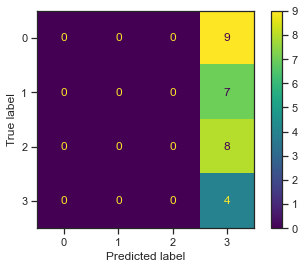

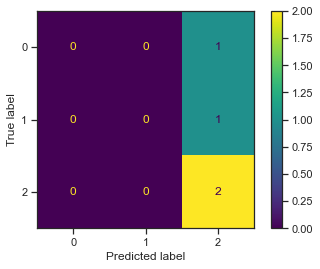

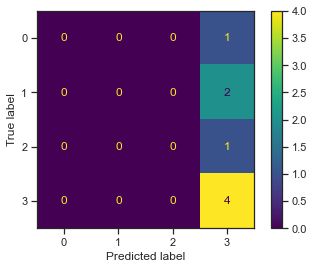

In [195]:
evaluation_parametrics("Convolution Neural Network", y_train, yp_train, y_val, yp_val, y_test, yp_test)

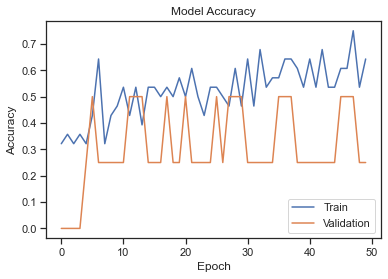

In [114]:
# Summarize History for Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()